## Rotate images properly

In [217]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
import seaborn as sns
from skimage import img_as_ubyte
import os
import math
from skimage.util import random_noise
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input
# from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline
sns.set()

In [285]:
# convert the image to grayscale and flip the foreground and background to ensure foreground is now "white" and
# the background is "black"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
# threshold the image, setting all foreground pixels to 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

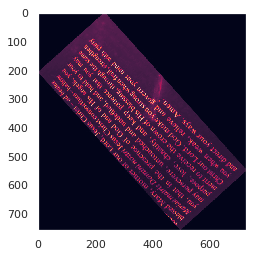

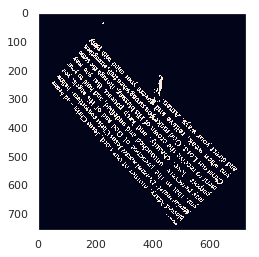

In [286]:
plt.imshow(gray)
plt.show()

plt.imshow(thresh)
plt.show()

In [287]:
# grab the (x, y) coordinates of all pixel values that are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
# the `cv2.minAreaRect` function returns values in the range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we need to add 90 degrees to the angle
print(angle)
if angle < -45:
    angle = -(90 + angle)
    print("Less than -45", angle)
# otherwise, just take the inverse of the angle to make it positive
else:
    angle = -angle
    print("Greater than -45", angle)

-48.024559020996094
Less than -45 -41.975440979003906


In [288]:
# rotate the image to deskew it
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
cv2.imwrite('rot.jpeg',rotated)

True

In [289]:
print(angle)

-41.975440979003906


[INFO] angle: -41.975


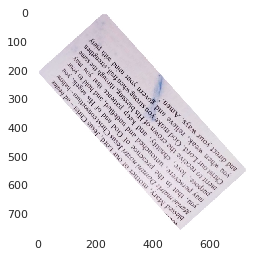

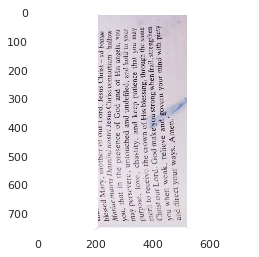

In [290]:
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
plt.imshow(img)
plt.show()
plt.imshow(rotated)
plt.show()

In [ ]:
## (1) Convert to gray, and threshold
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

## (2) Morph-op to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

## (3) Find the max-area contour
cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnt = sorted(cnts, key=cv2.contourArea)[-1]

## (4) Crop and save it
x,y,w,h = cv2.boundingRect(cnt)
dst = rotated[y:y+h, x:x+w]
plt.imshow(dst)
plt.show()
# cv2.imwrite('1.jpg', dst)

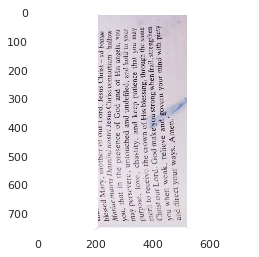

In [293]:
img = cv2.imread(r'image/aug/aug_241-shruthi_15.jpeg')
ret = rotate_img(img)

In [291]:
def rotate_img(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
#     print(angle)
    
    if angle < -45:
        angle = -(90 + angle)
#         print("Less than -45", angle)
    else:
        angle = -angle
#         print("Greater than -45", angle)
        
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    plt.imshow(rotated)
    plt.show()
    
    return rotated

## GrayScale conversion

In [220]:
img_paths=os.listdir('image/train_cleaned')
img_paths=['image/train_cleaned/'+x for x in img_paths]

cleaned_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]
print(type(cleaned_img), len(cleaned_img))

<class 'list'> 176


In [219]:
img_paths=os.listdir('image/train')
img_paths=['image/train/'+x for x in img_paths]
dirty_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]
print(type(dirty_img), len(dirty_img), dirty_img[0].shape)

<class 'list'> 175 (258, 540)


In [4]:
def process_image(path):
    img = cv2.imread(path)
    img = np.asarray(img, dtype="float32")
#     print(img)
    img = cv2.resize(img, (540, 500))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     print("Image after resizing and converting to grayscale", img)
    img = img/255.0
    img = np.reshape(img, (500, 540, 1))
    
    return img

In [5]:
original_image = []
original_path = 'image/train/'
for im in os.listdir(original_path):  # read image name from folder and append its path into "images" array     
    filename = (os.path.join(original_path,im))
    if(filename.endswith('.txt')==False):
#         print(filename)
        original_image.append(process_image(filename))

In [6]:
print(len(original_image),original_image[0].shape)

175 (500, 540, 1)


In [7]:
train_cleaned = []
traincleaned_path = 'image/train_cleaned/'
for im in os.listdir(traincleaned_path):  # read image name from folder and append its path into "images" array     
    filename = (os.path.join(traincleaned_path,im))
    if(filename.endswith('.txt')==False):
#         print(filename)
        train_cleaned.append(process_image(filename))

In [8]:
print(len(train_cleaned),train_cleaned[0].shape)

175 (500, 540, 1)


In [ ]:
original_path = 'image/aug/'
for im in os.listdir(original_path):  # read image name from folder and append its path into "images" array     
    filename = (os.path.join(original_path,im))
    if(filename.endswith('.txt')==False):
        print(filename)
        original_image.append(process_image(filename))

In [ ]:
print(len(original_image), original_image[0].shape)

In [9]:
# convert list to numpy array
X_train = np.asarray(original_image)
Y_train = np.asarray(train_cleaned)
# X_test = np.asarray(test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

In [221]:
def median_subtract(noisy_img):
    background=cv2.medianBlur(noisy_img, 23)
    result=cv2.subtract(background, noisy_img)
    result=cv2.bitwise_not(result)
    return (result, background)

In [226]:
denoised=cleaned_img[0]
print(dirty_img[0], dirty_img[0].shape)
result, background=median_subtract(dirty_img[0])
# print(rmse(denoised, result))

[[212 209 207 ... 207 201 200]
 [215 212 214 ... 209 202 202]
 [212 215 214 ... 201 207 205]
 ...
 [199 199 185 ... 217 215 204]
 [201 201 190 ... 221 215 210]
 [192 189 186 ... 219 211 205]] (258, 540)


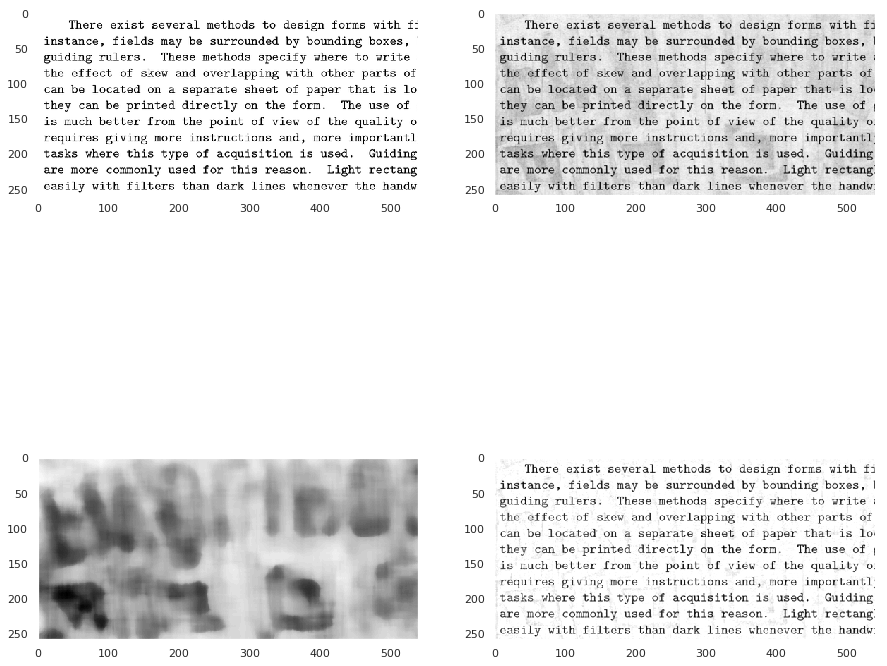

In [224]:

plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(denoised, cmap='gray')
axarr[0,1].imshow(dirty_img[0], cmap='gray')
axarr[1,0].imshow(background, cmap='gray')
axarr[1,1].imshow(result, cmap='gray')
